In [1]:
import numpy as np
import pandas as pd
x='data1.csv'
df = pd.read_csv(x)

In [30]:
df.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,5.144230,4.866669,0.500000
std,2.103965,1.964860,0.502519
min,0.900800,1.169000,0.000000
25%,3.469150,3.418175,0.000000
50%,5.265700,4.927500,0.500000
75%,6.720625,6.466375,1.000000
max,8.922100,8.567600,1.000000


In [3]:
import matplotlib.pyplot as plt
import numpy as np
y=np.array(df['y'])
X1=np.array(df['x1'])
X2=np.array(df['x2'])
col = {}
col[0] = 'g'
col[1] = 'r'
cols = []
for i in y:
  cols.append(col[i])
plt.scatter(X1,X2,c=cols)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<Figure size 640x480 with 1 Axes>

Text(0, 0.5, 'y')

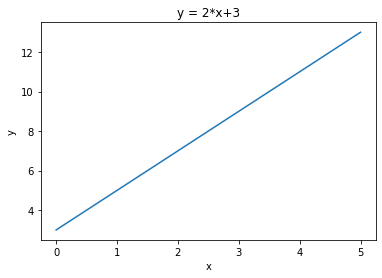

In [4]:
x = np.linspace(0, 5)
y=2*x+3
plt.plot(x, y, linestyle='-')
plt.title('y = 2*x+3')
plt.xlabel('x')
plt.ylabel('y')

In [5]:
V = np.random.randint(-1000, 1000, size=10)
def sigmoid(z):
      return 1 / (1 + np.exp(-z))

In [6]:
V_sig = sigmoid(V)

In [7]:
print(V)
print(V_sig)

[ 310 -149 -791  734  175  -99  924 -644  148  -91]
[1.00000000e+000 1.95039330e-065 0.00000000e+000 1.00000000e+000
 1.00000000e+000 1.01122149e-043 1.00000000e+000 2.06230861e-280
 1.00000000e+000 3.01440879e-040]


In [8]:
def hypothesis(X,theta):
  if(sigmoid(np.dot(X,theta)) > 0.5):
    print(0)
  else:
    print(1)

In [9]:
def cost(X,theta,y):
  return (-y * np.log(hypothesis(X,theta)) + (1-y) * np.log(1 - hypothesis(X,theta))).mean()

In [10]:
a = 'loan_data.csv'
df1 = pd.read_csv(a)
print(df1)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df1 = df1.drop(columns=['Loan_ID'])

In [13]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df_encoded = pd.get_dummies(df1,drop_first=True)

df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [15]:
X = df_encoded.drop(columns = "Loan_Status_Y")
y = df_encoded["Loan_Status_Y"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
76,3750,4750.0,176.0,360.0,1.0,1,0,0,0,0,0,0,0,1
314,2473,1843.0,159.0,360.0,1.0,0,1,0,0,0,0,0,0,0
605,2400,3800.0,NaN,180.0,1.0,1,1,0,0,0,1,0,0,1
197,1907,2365.0,120.0,NaN,1.0,0,0,0,0,0,1,0,0,1
233,8333,0.0,280.0,360.0,1.0,0,0,0,0,0,0,0,1,0


In [18]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test = imp_train.transform(X_test)

In [19]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [21]:
def comput_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * np.sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    return (cost , grad)

In [22]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        cost, grad = comput_cost(X,y,params)
        params = params - (learning_rate * grad)
        cost_history.append(cost)
    return (params,cost_history)

In [23]:
y_train = y_train.values.reshape(-1,1)

In [24]:
m1 = X_train.shape[0]
n1 = X_train.shape[1]
m2 = X_test.shape[0]
X_train =  np.append(np.ones((m1,1)),X_train,axis=1)
X_test =  np.append(np.ones((m2,1)),X_test,axis=1)
n = np.size(X_train, 1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03
(initial_cost,grad) = comput_cost(X_train, y_train, params)
print("Initial Cost: ", initial_cost)

( params_optimal, cost_history) = gradient_descent(X_train, y_train, params, learning_rate, iterations)
print("Optimal parameters: ", params_optimal)

Initial Cost:  -119.29048860386139
Optimal parameters:  [[ 0.74116161]
 [ 0.02845465]
 [-0.17087477]
 [-0.11432743]
 [-0.062996  ]
 [ 1.51065253]
 [ 0.00718774]
 [ 0.30575769]
 [-0.20314954]
 [ 0.12474209]
 [-0.06815583]
 [-0.10388326]
 [ 0.04229088]
 [ 0.4700865 ]
 [ 0.13520057]]


In [25]:
print("Cost hist:",cost_history)
print(len(cost_history))

Cost hist: [-119.29048860386139, -118.54366181562098, -117.8065857090076, -117.0791157278633, -116.36110906984669, -115.65242470119657, -114.95292336897457, -114.26246761090707, -113.58092176294397, -112.90815196465036, -112.24402616254444, -111.58841411149311, -110.94118737427334, -110.3022193194048, -109.67138511735612, -109.04856173522477, -108.43362792998565, -107.82646424040266, -107.22695297769185, -106.63497821502318, -106.05042577594342, -105.47318322180055, -104.90313983824531, -104.3401866208837, -103.78421626015003, -103.23512312546735, -102.69280324875884, -102.15715430737073, -101.62807560646449, -101.10546806093264, -100.58923417689033, -100.07927803279159, -99.5755052602167, -99.07782302437447, -98.58614000436098, -98.10036637321353, -97.62041377779633, -97.14619531855278, -96.67762552915617, -96.21462035608923, -95.75709713818078, -95.30497458612605, -94.8581727620149, -94.41661305889139, -93.98021818036534, -93.54891212029634, -93.12262014256794, -92.7012687609691, -92

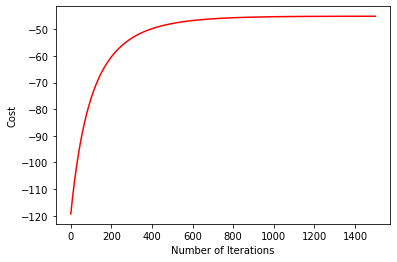

In [26]:
plt.figure()
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [27]:
(X_test)

array([[ 1.        , -0.06327606, -0.75609469, ..., -0.34377583,
        -0.84162541, -0.60553007],
       [ 1.        , -0.22485214,  0.67674081, ...,  2.90887237,
        -0.84162541,  1.65144565],
       [ 1.        , -0.41634972, -0.75609469, ..., -0.34377583,
        -0.84162541,  1.65144565],
       ...,
       [ 1.        , -0.45936187,  0.57456416, ..., -0.34377583,
         1.18817705, -0.60553007],
       [ 1.        , -0.06888634, -0.75609469, ..., -0.34377583,
        -0.84162541, -0.60553007],
       [ 1.        , -0.51527767,  0.33063957, ..., -0.34377583,
        -0.84162541,  1.65144565]])

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_pred=clf.predict(X_test)
prob =clf.predict_proba(X_test)

print(clf.score(X_test, y_test))

C:\Users\venna phaneendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8373983739837398


In [29]:
from sklearn.metrics import confusion_matrix 

cf = confusion_matrix(y_test, y_pred)
print(cf)

[[19 14]
 [ 6 84]]
